In [1]:
## Import all the functional modules of ProTiler-Mut

import protiler_mut.cluster as cl
import protiler_mut.threeD_rra as rra
import protiler_mut.ppi_mapping as pp
import protiler_mut.fetchProteinDatabase as fd

/home/whe/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/whe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/whe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. 

In [19]:
## Read the count tables of Tiling mutagenesis screens

## Must contains columns: 
## -'AA': amino acid location of mutation
## -'Function': the functional type of mutation: missense, nonsense, splice
## -'Gene': The offical symbol of target gene
## - All the sample conditions performed for the screen. eg. T0, T1, T2, etc.

df_all = pd.read_csv('./Input_samples/DDR_BE_screens_MCF10A_new.csv')
print(df_all)

            Unnamed: 0                 sgRNA_ID    Gene          Mutation  \
0                  NaN  iSTOP-controls-GTPBP4.1  GTPBP4               NaN   
1                  NaN  iSTOP-controls-GTPBP4.2  GTPBP4               NaN   
2                  NaN  iSTOP-controls-GTPBP4.3  GTPBP4               NaN   
3                  NaN  iSTOP-controls-GTPBP4.4  GTPBP4               NaN   
4                  NaN  iSTOP-controls-GTPBP4.5  GTPBP4               NaN   
...                ...                      ...     ...               ...   
37731         missense            Core-CHEK2.94   CHEK2  S422_G423_Delins   
37732         nonsense            Core-CHEK2.95   CHEK2             W485*   
37733       synonymous            Core-CHEK2.96   CHEK2             T476=   
37734  splice-acceptor            Core-CHEK2.98   CHEK2             L460=   
37735  splice-acceptor            Core-CHEK2.99   CHEK2               NaN   

                                                   AAChg     AA  \
0       

In [32]:
## Set parameters

## The sample conditions used for phenotypic mapping
sample_list = ['T0.mean', 'T18_UNT.mean','T18_CISP.mean', 'T18_OLAP.mean','T18_DOX.mean', 'T18_CPT.mean']
## The name of control sample
control_smp = 'T0.mean'
## Official symbol of target gene
gene = 'ERCC2'
# Parameters for clustering
n_cluster = 3; method = 'average'; metric = 'correlation'

## Threshold to call significant mutation
th = 2.5

## Name of folder to save the results
outputfolder = 'Clustering_results'

/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gene["Cluster"] = cluster_model.labels_
/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gene["Correlation"] = corr_vals


Clustermap figure saved to: /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/Clustering_results/ERCC2_ClusterMap.png
Clustering table saved to: /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/Clustering_results/ERCC2_Cluster_Table.csv


<Figure size 2400x1800 with 0 Axes>

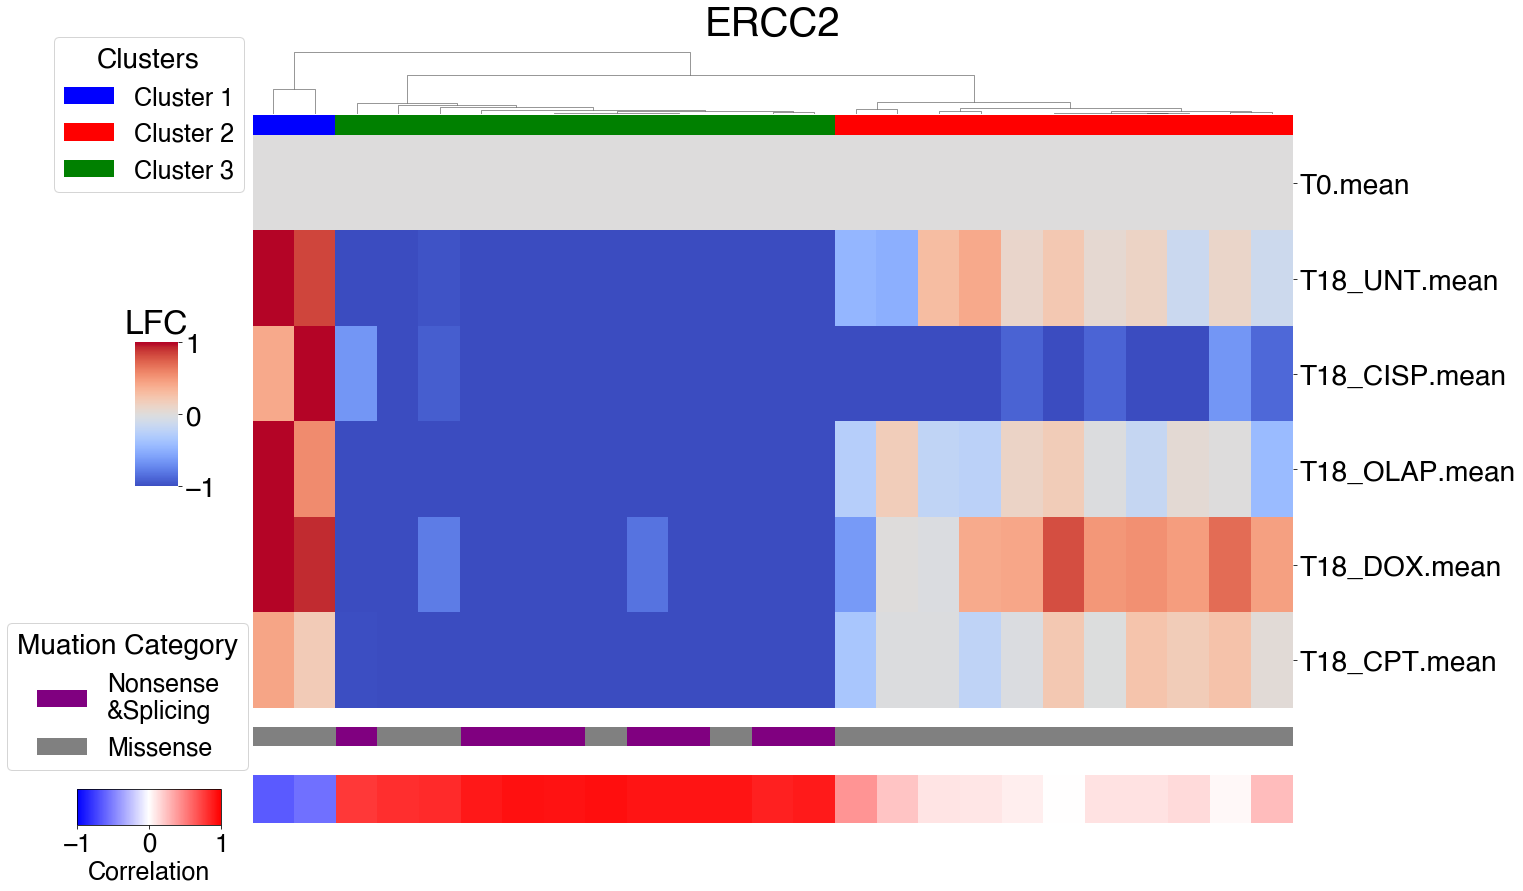

Dimensionality reduction plot saved to: /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/Clustering_results/ERCC2_DimReduction.png


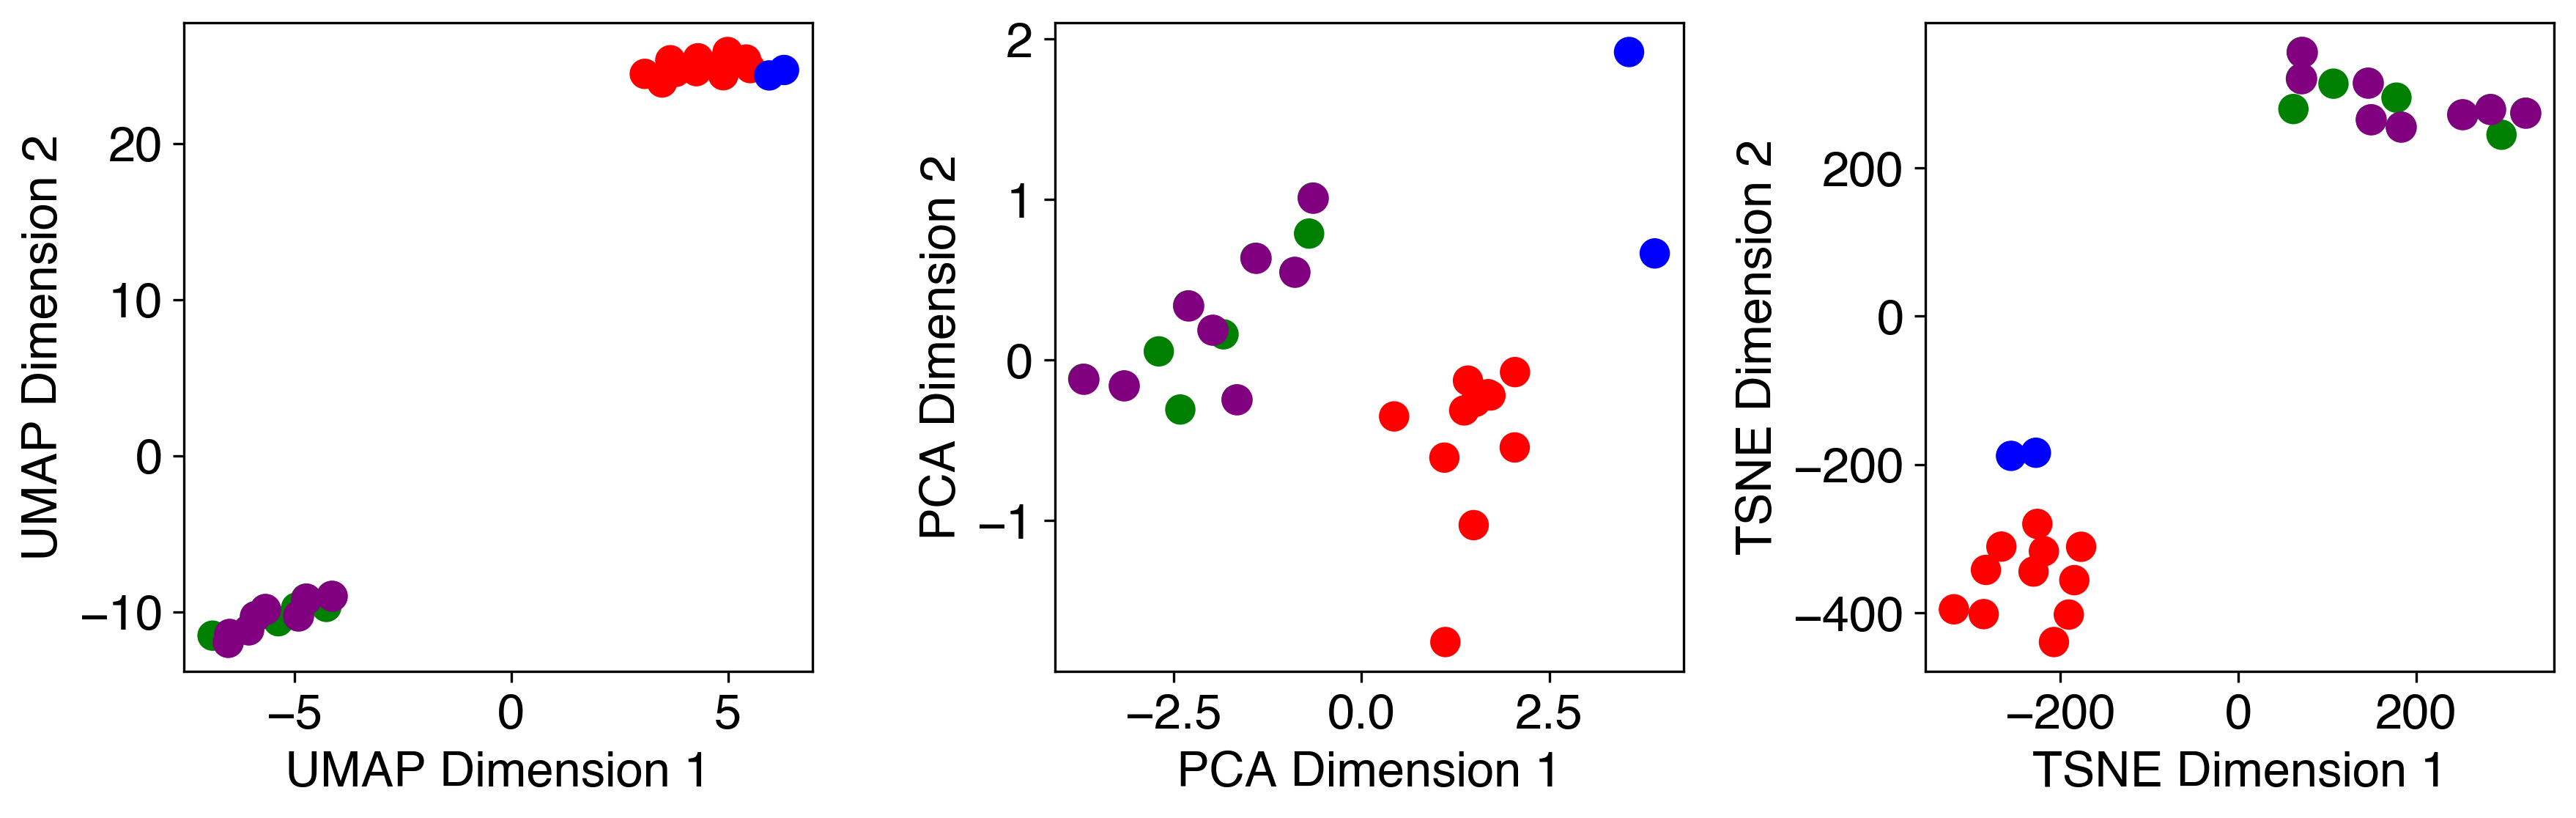

In [33]:
## Call significant mutation for specific gene and do clustering

df_all.index = list(df_all['Function'])
df_sig = df_all[abs(df_all['score'])>th]
df_gene = df_sig[df_sig['Gene']==gene]
df_clust = cl.clustering(df_gene, gene, sample_list, control_smp, n_cluster, method, metric, outputfolder)

In [34]:
## Annotate the mutations of their amino acid features

dicts = fd.download_and_load_jsons()
uni_id = rra.get_uniprot_id_from_gene_symbol(gene)
pdb = '/home/data/Alphafold_human/AF-'+uni_id+'-F1-model_v1.pdb' #put the 
df_anno = cl.annotation(dicts,df_clust,gene,outputfolder,pdb)

[cached]    exons_dic → /home/whe/.cache/protein_annotations/exons_dic.json
[cached]    domain_dic → /home/whe/.cache/protein_annotations/domain_dic.json
[cached]    alpha_dic → /home/whe/.cache/protein_annotations/alpha_dic.json
[cached]    po_dic → /home/whe/.cache/protein_annotations/po_dic.json
[cached]    clinvar_dic → /home/whe/.cache/protein_annotations/clinvar_dic.json


/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['Alphafold.score'] = alpha_ls
/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['Pfam.domain'] = dom_ls
/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Attempt to parse the PDB structure
Annotation table saved to: /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/Clustering_results/ERCC2_Missense_Annotation_Table.csv


/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['ResidueDepth'] = rd_ls
/home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/protiler_mut/cluster.py:489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['ASA'] = asa_ls


In [35]:
## Output table for mutation annotation
df_anno

,Unnamed: 0,sgRNA_ID,Gene,Mutation,AAChg,AA,Function,T0.mean,T18_UNT.mean,T18_CISP.mean,...,score,Rank,Cluster,Correlation,Alphafold.score,Pfam.domain,Phospho.site,ClinVar,ResidueDepth,ASA
missense,missense,Core-ERCC2.109,ERCC2,V242I,p.V242I,242.0,missense,-0.153400,-0.610686,-1.526639,...,2.916264,0.022445,1,-0.646578,90.37,NA,0,NA,2.440006,0.056338
splice-donor,splice-donor,Core-ERCC2.162,ERCC2,S436N,p.S436N,436.0,splice-donor,0.640334,-1.754709,-1.681387,...,6.865437,0.004001,2,-0.560001,92.26,NA,0,NA,2.813213,0.030769
splice-donor,splice-donor,Core-ERCC2.163,ERCC2,S436N,p.S436N,436.0,splice-donor,0.496635,-2.347813,-1.989406,...,8.602340,0.001590,2,0.776394,92.26,NA,0,NA,2.813213,0.030769
splice-donor,splice-donor,Core-ERCC2.210,ERCC2,Q555=,p.Q555=,555.0,splice-donor,-0.007832,-2.410786,-1.675306,...,6.896010,0.003948,2,0.903878,91.01,Helicase_C_2,0,NA,1.788464,0.338384
missense,missense,Core-ERCC2.217,ERCC2,G534N,p.G534N p.G534S p.G534D,534.0,missense,-0.157914,-2.194378,-1.829830,...,5.479566,0.007261,2,0.932516,92.67,Helicase_C_2,0,NA,5.561492,0.000000
missense,missense,Core-ERCC2.239,ERCC2,E606K,p.E606K p.E606_G607delinsKR p.E606_G607delinsK...,606.0,missense,0.268670,0.367084,-0.623974,...,2.742097,0.024618,1,0.929218,75.46,Helicase_C_2,0,Arg601Leu,2.279177,0.231959
missense,missense,Core-ERCC2.240,ERCC2,E606K,p.E606K p.E606_G607delinsKR p.E606_G607delinsK...,606.0,missense,0.773002,0.902235,-0.778328,...,5.715337,0.006651,1,0.937592,75.46,Helicase_C_2,0,Arg601Leu,2.279177,0.231959
splice-acceptor,splice-acceptor,Core-ERCC2.26,ERCC2,A62T,p.A62T,62.0,splice-acceptor,-0.051556,-1.511078,-1.222486,...,4.832313,0.009646,2,0.918778,91.86,ResIII,0,NA,1.864266,0.462264
missense,missense,Core-ERCC2.262,ERCC2,R666Q,p.R666Q p.R666_A667delinsQT p.R666_A667delinsQ...,666.0,missense,0.165378,0.271832,-0.475292,...,2.781203,0.024327,1,0.915888,81.30,Helicase_C_2,0,Arg666Trp,2.326867,0.044355
missense,missense,Core-ERCC2.275,ERCC2,G713S,p.G713S p.G713N p.G713D p.G713_V714delinsNI p....,713.0,missense,0.028013,-0.936573,-0.887016,...,3.369716,0.017967,2,0.919146,94.56,NA,0,Ala717Gly,4.270311,0.000000


1D clusering map saved to: /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/Clustering_results/ERCC2_ClusterDistribution_1D.png


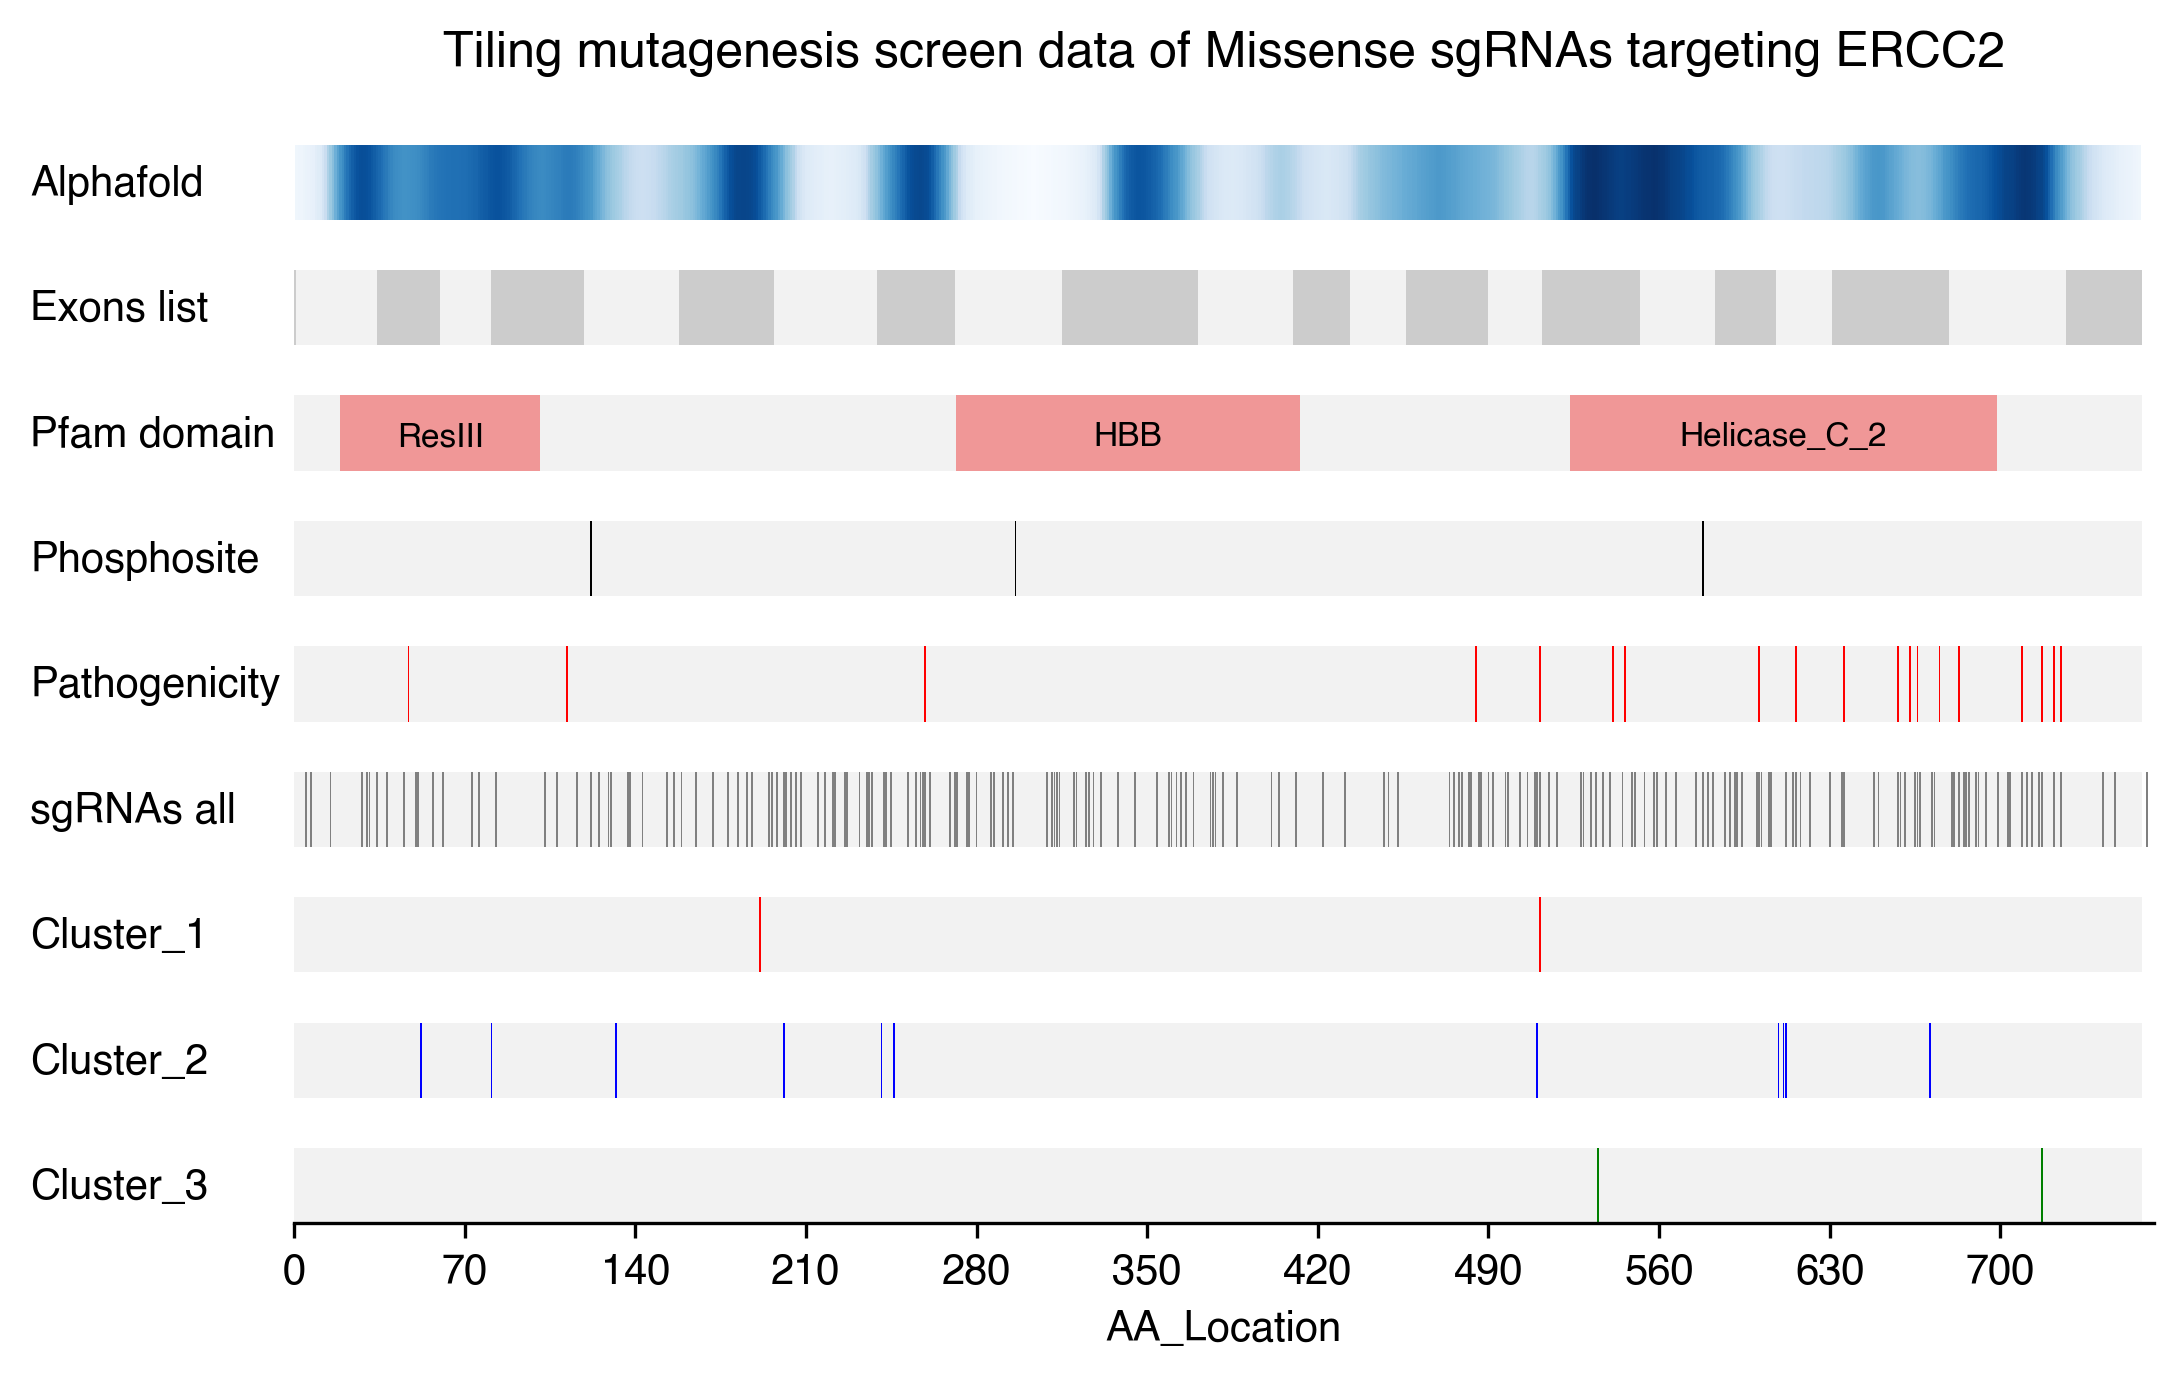

In [36]:
## Visaulization of mutations in different clusters along protein 1D sequence

cl.visualization_1d(dicts,df_all,df_clust,gene,outputfolder)

In [37]:
## Visaulization of mutations in different clusters along protein 3D structure
## Return pymol sessions for visaulization using Pymol software

cluster_ls = []
df_clust = df_clust[df_clust['Function']=='missense']

for c in sorted(set(df_clust['Cluster'])):
    df_c = df_clust[df_clust['Cluster']==c]
    aa_ls = [int(aa) for aa in df_c['AA'] if aa!='NA']
    cluster_ls.append(aa_ls)
        
print(cluster_ls)

cl.visualization_3d(gene,cluster_ls,outputfolder,pdb)

[[506, 186], [242, 606, 606, 666, 51, 76, 506, 130, 605, 196, 235], [534, 713]]
506+186
242+606+606+666+51+76+506+130+605+196+235
534+713
Save pymol session and images ...
Finished


In [38]:
## Perform 3D-rra method on mutations in different clusters

outputfolder = '3D_RRA_results'

df_all['Rank'] = abs(df_all['score']).rank(ascending=False)/df_all.shape[0]

th1 = 15; th2 = 5 ## Distance thresholds to call substructures

df_sig = df_all[abs(df_all['score'])>th]
df_gene = df_sig[df_sig['Gene']==gene]
df_gene = df_gene.dropna(subset=['AA'])
df_clust = df_clust.dropna(subset=['AA'])

df_substr = rra.RRA_3D(gene, df_all, df_gene, df_clust, pdb, th1, th2, 
                       outputfolder,num_permutations=10000,significance_cutoff=0.25)

506.0
186.0
506
['res506'] [504, 505, 506, 507, 508, 510, 511, 520, 540, 544, 621, 622, 623, 681, 683]
[506, 506] [0.02207441170235319, 0.02663239347042612]
186
['res186'] [182, 183, 184, 185, 186, 187, 188]
[186] [0.02591689633241467]
242.0
606.0
606.0
666.0
51.0
76.0
506.0
130.0
605.0
196.0
235.0
51
['res51'] [12, 21, 24, 25, 42, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[51] [0.016721433114267544]
506
['res506'] [504, 505, 506, 507, 508, 510, 511, 520, 540, 544, 621, 622, 623, 681, 683]
[506, 506] [0.02207441170235319, 0.02663239347042612]
235
242
605
666
76
606
['res235', 'res242', 'res605', 'res666', 'res76', 'res606'] [44, 48, 79, 209, 233, 234, 235, 236, 237, 238, 457, 458, 459, 460, 210, 213, 239, 240, 241, 242, 243, 244, 245, 246, 538, 599, 600, 601, 602, 603, 604, 605, 606, 607, 662, 663, 666, 608, 609, 610, 661, 664, 665, 667, 668, 669, 74, 75, 76, 77, 78, 80]
[242, 606, 606, 666, 76, 605, 235] [0.022445410218359125, 0.024618401526393895, 0.0066514733941064235, 0.02432690269238923

In [12]:
## Visualize substructres on 3D structure
## Return pymol session for visaulization on pymol software

rra.visualize_substructure(df_substr,pdb,gene,outputfolder)

Saved session for cluster_3 → 3D_RRA_results/ATM_cluster_3.pse


In [39]:
df_substr

,Gene,Cluster,Seed_aa,Substructure,Ro_value,Pvalue,FDR
0,ERCC2,cluster_2,"[242, 606, 606, 666, 76, 605, 235]","[44, 48, 79, 209, 233, 234, 235, 236, 237, 238...",5.480485e-12,0.0001,0.001996


In [43]:
import os
## Perform PPI mapping using substructure or mutation as anchor

mut_numbers = [76,235,241,606,605]

pdb_path = './Input_samples/ERCC2_PDBs/'

#input the chain name where mutation happens
chains = ['A','A','A','A','A','A'] 

##provide all the PDB files of complexes containing target protein
pdb_files = [os.path.join(pdb_path,s) for s in os.listdir(pdb_path) if '.pdb' in s] 

print(chains,pdb_files)

dis_th = 5 ## threshold to determing the interacting residues
        
df_ppi = pp.build_ppi_interface_table(gene, mut_numbers,  pdb_files, chains, dis_th)

['A', 'A', 'A', 'A', 'A', 'A'] ['./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_HUMAN__1542aa_unrelaxed_af2mv3_model_1.pdb', './Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_HUMAN__1542aa_unrelaxed_af2mv3_model_2.pdb', './Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_HUMAN__1542aa_unrelaxed_af2mv3_model_4.pdb', './Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC5_HUMAN__1946aa_unrelaxed_af2mv3_model_1.pdb', './Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC5_HUMAN__1946aa_unrelaxed_af2mv3_model_2.pdb', './Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC5_HUMAN__1946aa_unrelaxed_af2mv3_model_4.pdb']


In [45]:
df_ppi

,PDB_File,Mutation_Chain,Mutation,At_Interface,Contact_Count,Contact_Details,Gene
0,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,76,False,0,,ERCC2
1,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,235,False,0,,ERCC2
2,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,241,False,0,,ERCC2
3,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,606,False,0,,ERCC2
4,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,605,False,0,,ERCC2
5,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,76,False,0,,ERCC2
6,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,235,False,0,,ERCC2
7,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,241,False,0,,ERCC2
8,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,606,False,0,,ERCC2
9,./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC3_...,A,605,False,0,,ERCC2


In [49]:
outputfolder = 'PPI_Mapping_results'

df_ppi.to_csv(os.path.join(os.getcwd(),outputfolder, f"{gene}_{str(mut_numbers)}_PPI_Mapping_list.csv")) ##show all the mutation and its potential affected PPI interfaces
pp.visualize_interfaces(df_ppi,outputfolder)

Saved PyMOL session for ./Input_samples/ERCC2_PDBs/ERCC2_HUMAN__ERCC5_HUMAN__1946aa_unrelaxed_af2mv3_model_2.pdb to /home/whe/Work_progress/BE_screen_pipeline/ProTiler-Mut/PPI_Mapping_results/ERCC2_HUMAN__ERCC5_HUMAN__1946aa_unrelaxed_af2mv3_model_2.pdb_interfaces.pse
